## Yield Curve Fitting Approach

In [80]:
import pandas as pd
from ECIRModel import ECIRModel
from CIRModel import BasicCIRModel
import numpy as np
import matplotlib.pyplot as plt

### Merge Dataframe

In [81]:
import pandas as pd

# Load the DGS_30 data
dgs_30_path = 'DGS_30.csv'
dgs_30_data = pd.read_csv(dgs_30_path)

# Load the DGS3MO data
dgs3mo_path = 'DGS3MO.csv'
dgs3mo_data = pd.read_csv(dgs3mo_path)

# Convert the 'DATE' column to datetime and set it as index for both DataFrames
dgs_30_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
dgs_30_data['Date'] = pd.to_datetime(dgs_30_data['Date'])
dgs_30_data.set_index('Date', inplace=True)

dgs3mo_data.rename(columns={'DATE': 'Date'}, inplace=True)
dgs3mo_data['Date'] = pd.to_datetime(dgs3mo_data['Date'])
dgs3mo_data.set_index('Date', inplace=True)

# Insert the DGS3MO data into the DGS_30 data as the first column
dgs_30_data.insert(0, 'DGS3MO', dgs3mo_data['DGS3MO'])

data=dgs_30_data
# Check the result
data.head()

,DGS3MO,DGS1,DGS2,DGS3,DGS4,DGS5,DGS6,DGS7,DGS8,DGS9,...,DGS21,DGS22,DGS23,DGS24,DGS25,DGS26,DGS27,DGS28,DGS29,DGS30
Date,,,,,,,,,,,,,,,,,,,,,
1981-09-01,17.010,17.0600,16.780,16.57,16.350396,16.120,15.898415,15.710,15.573295,15.478799,...,15.070462,15.049236,15.025332,14.997763,14.965539,14.927672,14.883173,14.831054,14.770326,14.7000
1981-09-02,16.650,17.1600,16.780,16.43,16.225968,16.090,15.924878,15.750,15.604572,15.490415,...,15.103136,15.093330,15.078842,15.057928,15.028848,14.989861,14.939224,14.875196,14.796035,14.7000
1981-09-03,16.960,17.3100,16.900,16.48,16.262789,16.140,15.967593,15.780,15.640102,15.546094,...,15.194779,15.177243,15.156281,15.130776,15.099616,15.061687,15.015875,14.961065,14.896145,14.8200
1981-09-04,16.640,17.2400,16.890,16.52,16.302912,16.170,16.019604,15.860,15.720523,15.604793,...,15.237907,15.232570,15.222048,15.204398,15.177676,15.139941,15.089248,15.023655,14.941220,14.8400
1981-09-07,16.565,17.2775,16.935,16.55,16.336354,16.215,16.066772,15.905,15.767511,15.657616,...,15.328694,15.324179,15.314622,15.298188,15.273045,15.237358,15.189294,15.127019,15.048698,14.9525


### CIR Model

#### Yield Curve Prediction

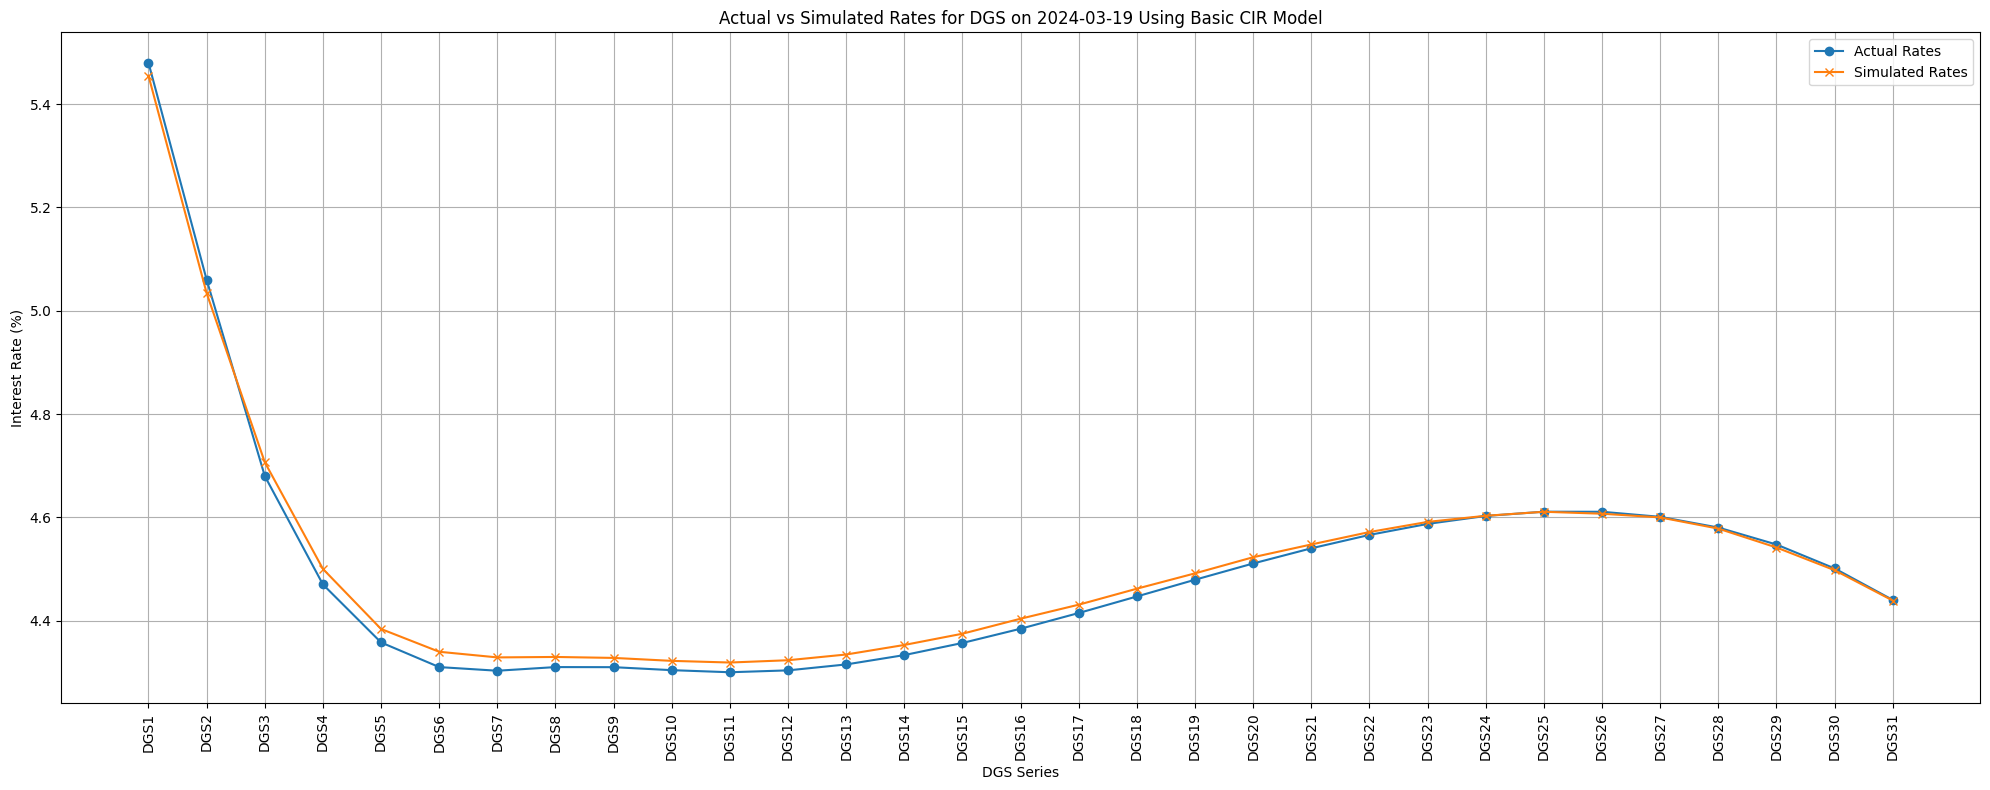

,Actual Rates,Simulated Rates
DGS3MO,5.480000,5.454961
DGS1,5.060000,5.034072
DGS2,4.680000,4.706632
DGS3,4.470000,4.500079
DGS4,4.357705,4.383764
DGS5,4.310000,4.339647
DGS6,4.302930,4.328739
DGS7,4.310000,4.329609
DGS8,4.309832,4.327751
DGS9,4.304042,4.322051


In [82]:
# Optimized parameters provided by the user
optimized_params = {
    "kappa": 1.2310,
    "mu_r": 0.0459,
    "sigma": 0.1410
}

# Creating an instance of the BasicCIRModel with the optimized parameters
basic_cir_model = BasicCIRModel(**optimized_params)


# Define the simulation date
simulation_date = pd.Timestamp('2024-03-19')

# Extract the actual rates for the simulation date from the mock data
# (Replace this with the actual data loading code in practice)
actual_rates = data.loc[simulation_date]

# Define the simulation function for a single rate using BasicCIRModel
def simulate_single_rate_cir(model, initial_rate):
    dt = 1 / 252  # Assume dt is 1 day as we simulate just for the next day
    return model.next_rate(initial_rate, dt)

# Create a dictionary to hold the simulated rates for each DGS using BasicCIRModel
simulated_rates_cir = {}

# Run the simulation for each DGS column
for column in actual_rates.index:
    if 'DGS' in column:
        initial_rate = data[column].loc[data.index < simulation_date].iloc[-1]
        simulated_rates_cir[column] = simulate_single_rate_cir(basic_cir_model, initial_rate)

# Convert the simulated rates dictionary to a DataFrame
simulated_rates_cir_df = pd.DataFrame(simulated_rates_cir, index=[simulation_date])

# Combine actual and simulated rates into one DataFrame for comparison
comparison_data_cir = pd.DataFrame({
    'Actual Rates': actual_rates,
    'Simulated Rates': simulated_rates_cir_df.iloc[0]
})

# Now we'll create a line plot with the correct x-axis labels
dgs_labels = [f'DGS{i+1}' for i in range(len(comparison_data_cir.index))]

# Plotting
plt.figure(figsize=(20, 8))
plt.plot(dgs_labels, comparison_data_cir['Actual Rates'], label='Actual Rates', marker='o')
plt.plot(dgs_labels, comparison_data_cir['Simulated Rates'], label='Simulated Rates', marker='x')
plt.title('Actual vs Simulated Rates for DGS on 2024-03-19 Using Basic CIR Model')
plt.xlabel('DGS Series')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

comparison_data_cir  

#### 
Bond Price Prediction

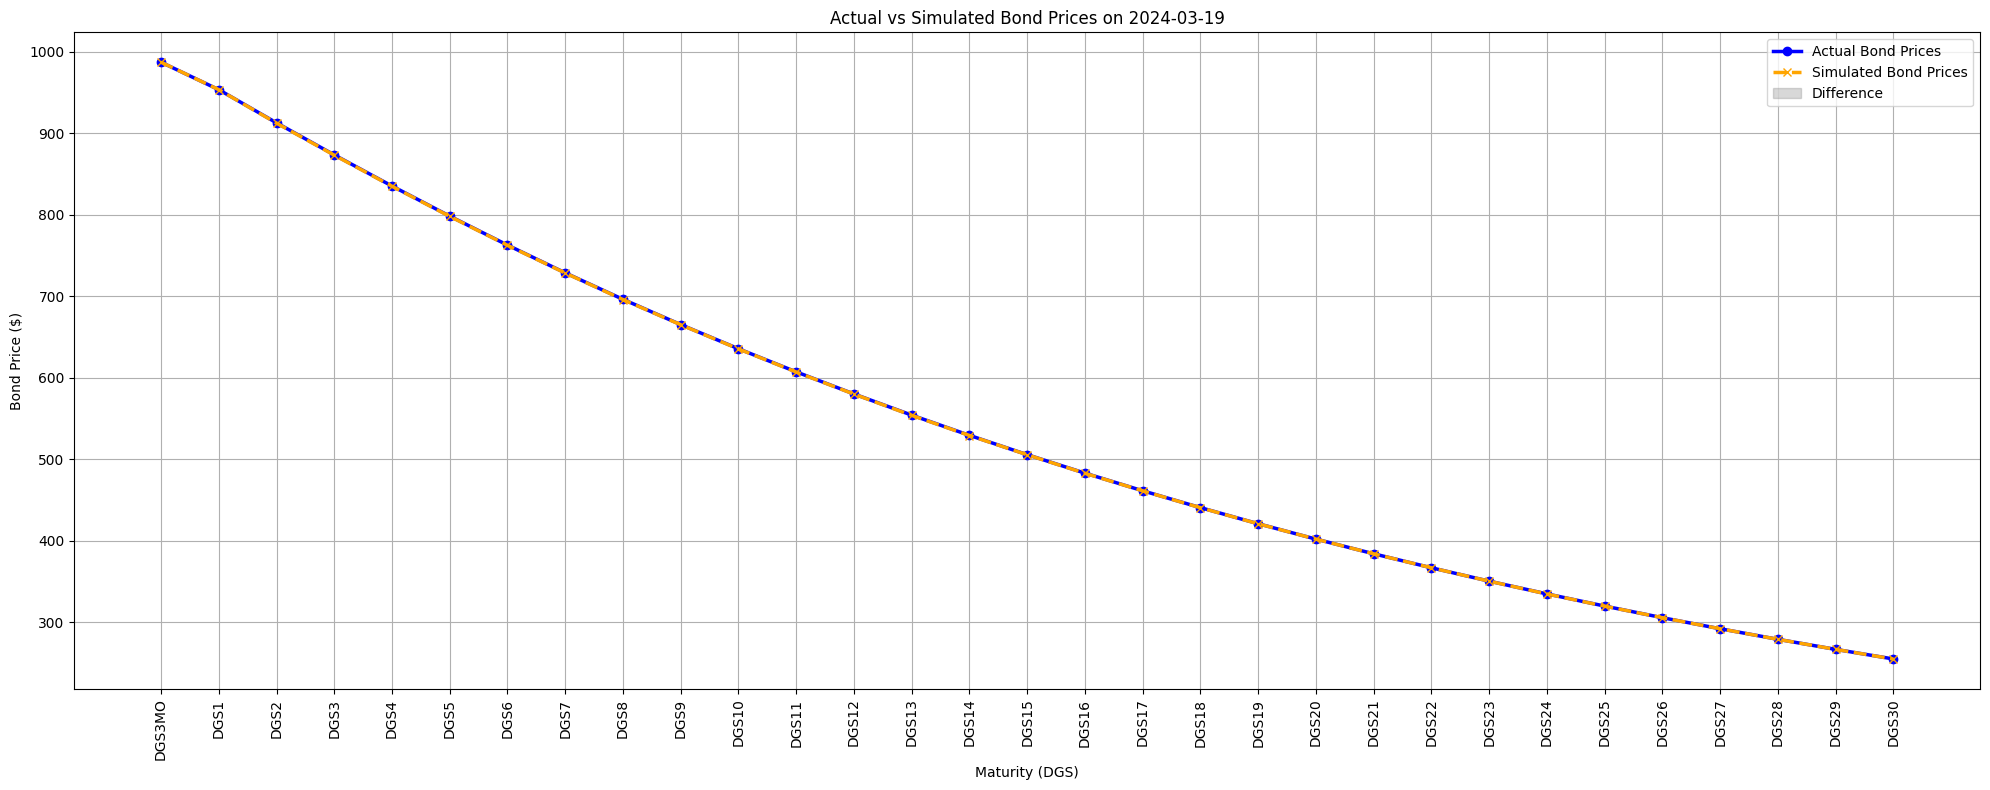

In [83]:
# Define the bond's face value
face_value = 1000  # For example, the face value of the bond

# Function to convert nominal annual rate to continuous compounding rate
def nominal_to_continuous(nominal_rate):
    return np.log(1 + nominal_rate)

# Function to calculate bond price using the CIR model for zero-coupon bonds
def calculate_bond_price_cir(model, rt, T, t=0):
    return model.bond_price(rt, T, t)

# Function to simulate bond prices
def simulate_bond_prices(model, data, face_value, simulation_date):
    simulated_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            try:
                last_rate = data[column].loc[data.index < simulation_date].iloc[-1] / 100
                simulated_rate = model.next_rate(last_rate, 1/252)  
                
                maturity = (int(column.replace('DGS', '').replace('MO', '')) / 12) if 'MO' in column else int(column.replace('DGS', ''))
                continuous_rate = nominal_to_continuous(simulated_rate)
                
                bond_price = calculate_bond_price_cir(model, continuous_rate, maturity) * face_value
                simulated_bond_prices[column] = bond_price
            except ValueError:
                continue
    return simulated_bond_prices


# Function to calculate actual bond prices using market rates
def calculate_actual_bond_prices(data, face_value, simulation_date):
    actual_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            try:
                last_nominal_rate = data[column].loc[data.index <= simulation_date].iloc[-1] / 100
                last_continuous_rate = nominal_to_continuous(last_nominal_rate)
                
                maturity = (int(column.replace('DGS', '').replace('MO', '')) / 12) if 'MO' in column else int(column.replace('DGS', ''))
                
                # Calculate bond price using the continuous rate
                bond_price = calculate_bond_price_cir(basic_cir_model, last_continuous_rate, maturity) * face_value
                actual_bond_prices[column] = bond_price
            except ValueError:
                continue
    return actual_bond_prices

# Simulate bond prices
simulated_bond_prices = simulate_bond_prices(basic_cir_model, data, face_value, simulation_date)

# Calculate actual bond prices
actual_bond_prices = calculate_actual_bond_prices(data, face_value, simulation_date)

# Create DataFrames from the bond prices
simulated_bond_prices_df = pd.DataFrame(simulated_bond_prices, index=[simulation_date])
actual_bond_prices_df = pd.DataFrame(actual_bond_prices, index=[simulation_date])

# Create a DataFrame from the simulated bond prices
simulated_bond_prices_df = pd.DataFrame(simulated_bond_prices, index=[simulation_date])# Function to calculate actual bond prices using the same formula as for simulated prices


# Create a DataFrame from the actual bond prices
actual_bond_prices_df = pd.DataFrame(actual_bond_prices, index=[simulation_date])

# Create a DataFrame combining actual and simulated bond prices
combined_bond_prices_df = pd.DataFrame({
    'Actual Bond Prices': actual_bond_prices_df.iloc[0],
    'Simulated Bond Prices': simulated_bond_prices_df.iloc[0]
})


# Plotting both actual and simulated bond prices with enhanced visibility
plt.figure(figsize=(20, 8))

# Plot actual bond prices with a solid blue line and circle markers
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Actual Bond Prices'],
         label='Actual Bond Prices', marker='o', linestyle='-', color='blue', linewidth=2.5)

# Plot simulated bond prices with a dashed orange line and x markers
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Simulated Bond Prices'],
         label='Simulated Bond Prices', marker='x', linestyle='--', color='orange', linewidth=2.5)

# Highlight the differences by plotting the differences
plt.fill_between(combined_bond_prices_df.index, 
                 combined_bond_prices_df['Actual Bond Prices'], 
                 combined_bond_prices_df['Simulated Bond Prices'], 
                 color='gray', alpha=0.3, label='Difference')

# Title and labels
plt.title('Actual vs Simulated Bond Prices on ' + str(simulation_date.date()))
plt.xlabel('Maturity (DGS)')
plt.ylabel('Bond Price ($)')

# Improve the x-axis labels readability
plt.xticks(rotation=90)

# Legend and grid
plt.legend()
plt.grid(True)

# Layout adjustment
plt.tight_layout()

# Show the plot
plt.show()


In [84]:
combined_bond_prices_df

,Actual Bond Prices,Simulated Bond Prices
DGS3MO,987.008875,987.033652
DGS1,953.304664,953.288954
DGS2,912.647689,912.268216
DGS3,873.326469,872.948359
DGS4,835.132555,834.818219
DGS5,798.205797,797.879517
DGS6,762.667283,762.396188
DGS7,728.629534,728.382332
DGS8,696.149351,695.884289
DGS9,665.145829,664.942647


### ECIR Model

#### Yield Rate Prediction

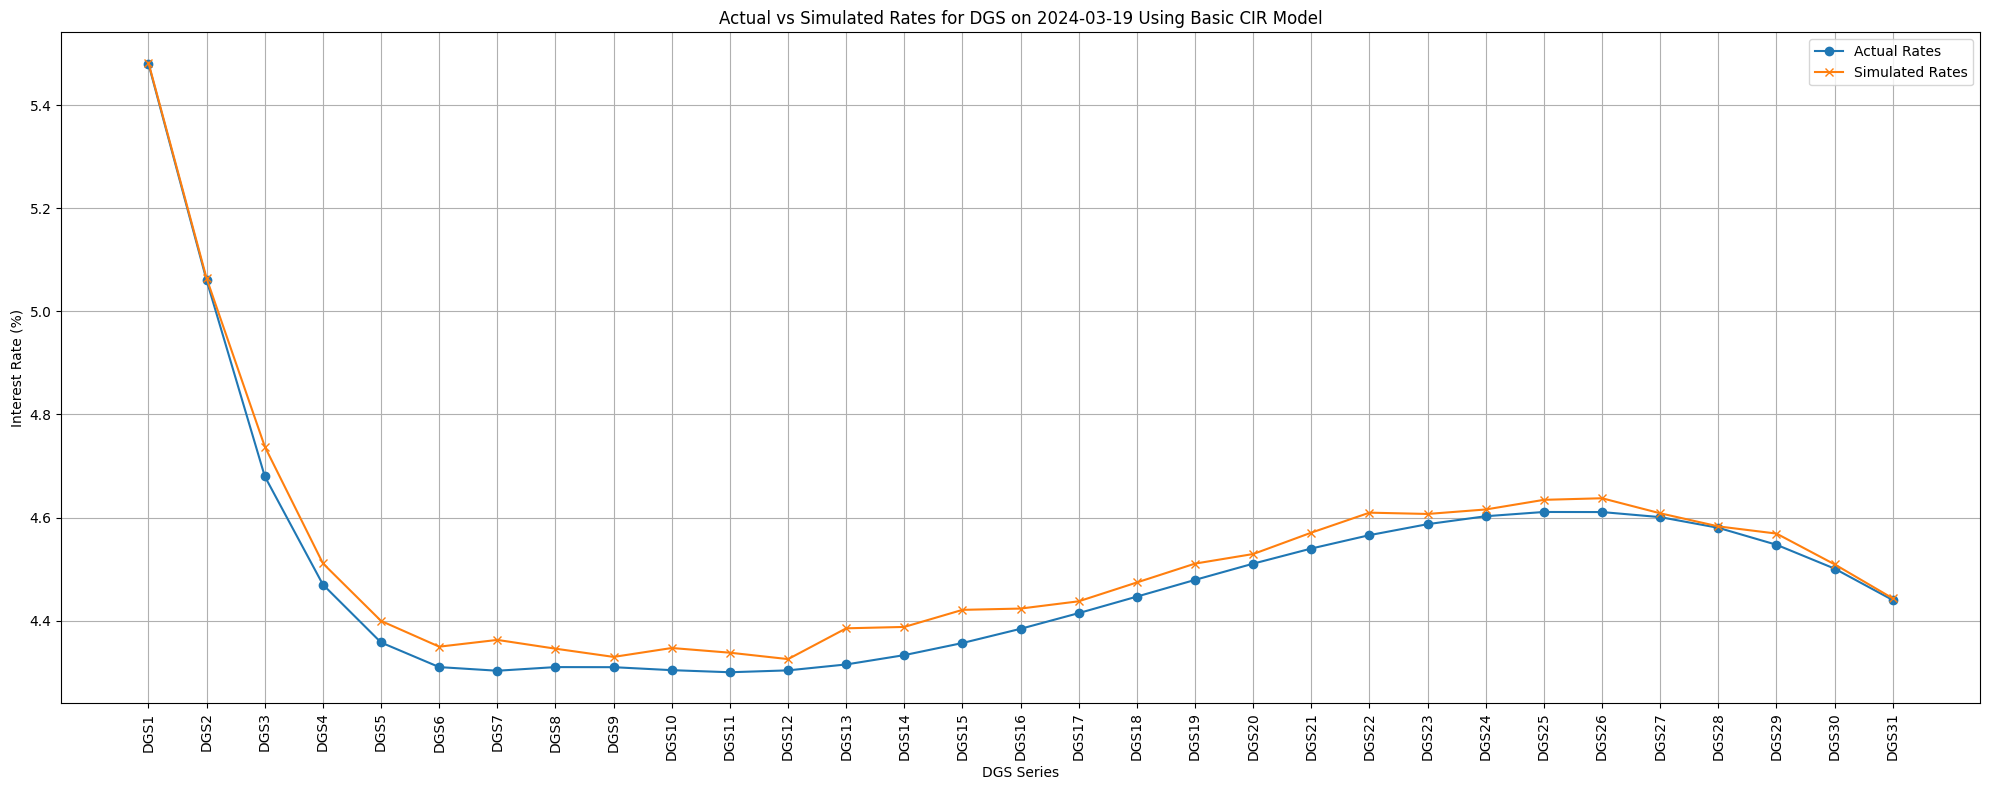

In [85]:
# Model parameters
params = {
    "kappa": 0.01227,    
    "mu_r": 0.09854,     
    "sigma": 0.09395,    
    "mu": 0.002995,      
    "gamma": 0.002321,   
    "r": 66,             
    "p": 0.3049          
}

# Creating an instance of the ECIRModel
model = ECIRModel(**params)# Define the simulation date
simulation_date = pd.Timestamp('2024-03-19')

# Extract the actual rates for the simulation date
actual_rates = data.loc[simulation_date]

# Define the simulation function for a single rate
def simulate_single_rate(model, initial_rate):
    # Assume dt is 1 day as we simulate just for the next day
    dt = 1 / 252
    return model.next_rate(initial_rate, dt)

# Create a dictionary to hold the simulated rates for each DGS
simulated_rates = {}

# Run the simulation for each DGS column
for column in actual_rates.index:
    if 'DGS' in column:
        # Get the initial rate from the previous available data point
        initial_rate = data[column].loc[data.index < simulation_date].iloc[-1]
        # Simulate the rate using the model
        simulated_rates[column] = simulate_single_rate(model, initial_rate)

# Convert the simulated rates dictionary to a DataFrame
simulated_rates_df = pd.DataFrame(simulated_rates, index=[simulation_date])

# Combine actual and simulated rates into one DataFrame for comparison
comparison_data = pd.DataFrame({
    'Actual Rates': actual_rates,
    'Simulated Rates': simulated_rates_df.iloc[0]
})


comparison_data
# Now we'll create a line plot with the correct x-axis labels
dgs_labels = [f'DGS{i+1}' for i in range(len(comparison_data_cir.index))]

# Plotting
plt.figure(figsize=(20, 8))
plt.plot(dgs_labels, comparison_data['Actual Rates'], label='Actual Rates', marker='o')
plt.plot(dgs_labels, comparison_data['Simulated Rates'], label='Simulated Rates', marker='x')
plt.title('Actual vs Simulated Rates for DGS on 2024-03-19 Using Basic CIR Model')
plt.xlabel('DGS Series')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Bond Price Prediction

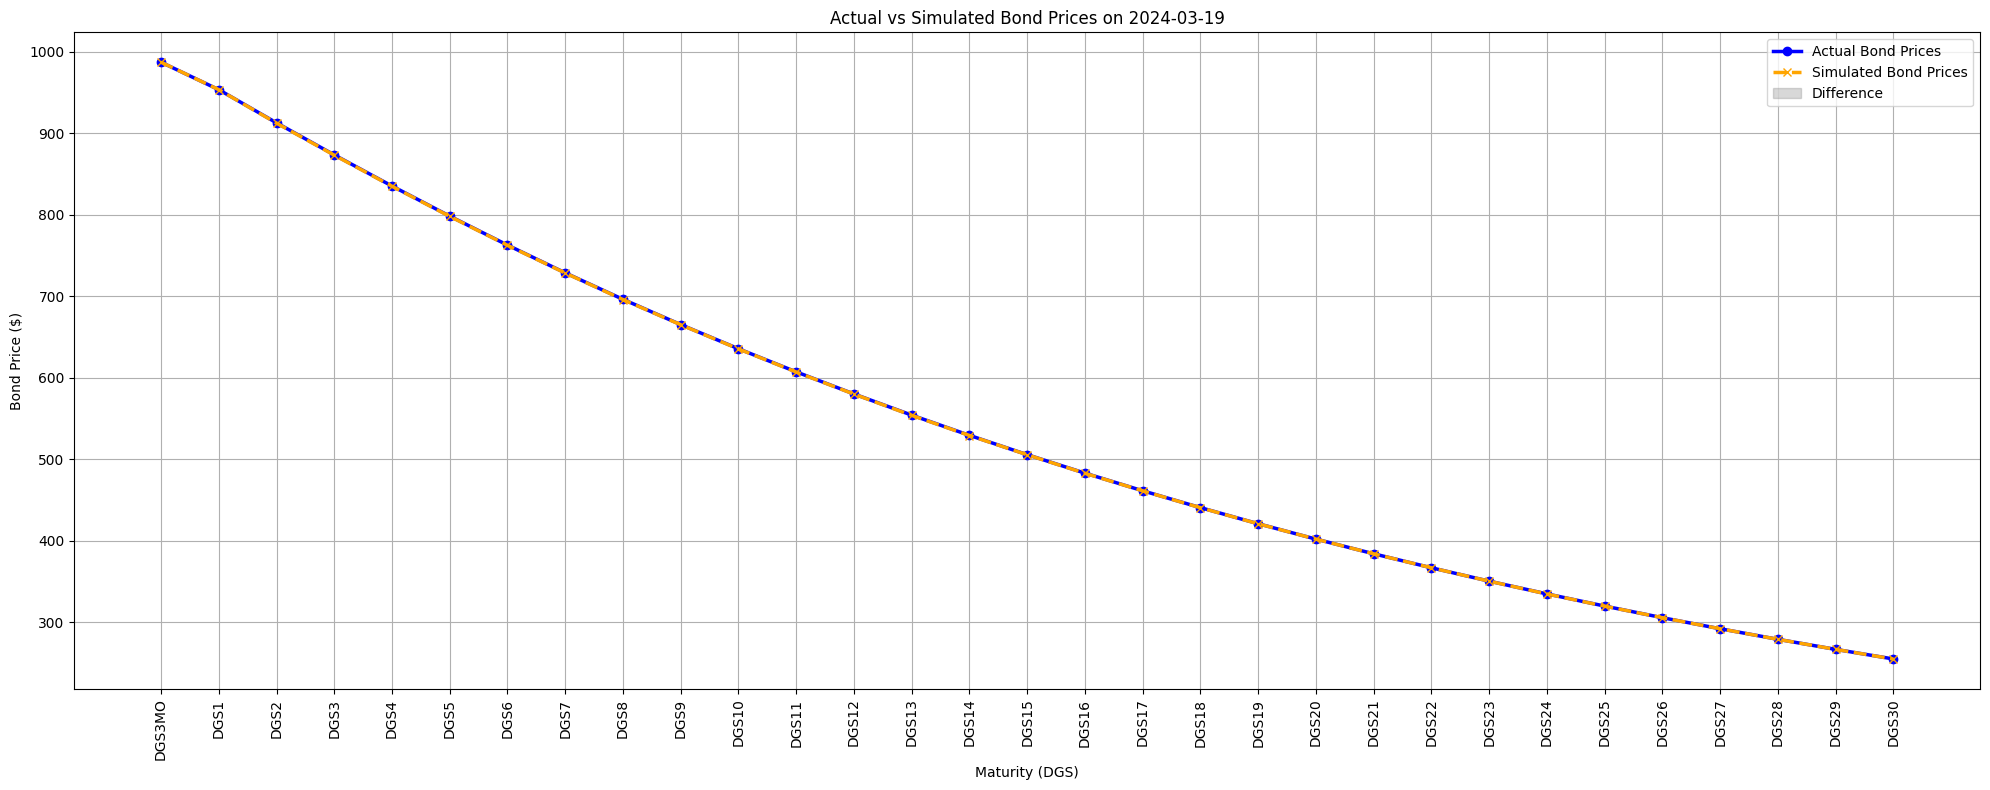

In [86]:
import pandas as pd
import matplotlib.pyplot as plt


# Define functions and models to simulate bond prices
def calculate_bond_price(face_value, yield_rate, maturity):
    """Calculate bond price given face value, yield rate, and maturity."""
    return face_value / ((1 + yield_rate) ** maturity)

def simulate_single_rate(model, initial_rate):
    """Simulate the next day's rate assuming dt as 1 day."""
    dt = 1 / 252  # Assume dt is one day
    return model.next_rate_with_jumps(initial_rate, dt)

def simulate_bond_prices(model, data, face_value, simulation_date):
    """Simulate bond prices using the latest rate before the simulation date."""
    simulated_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            maturity = int(column.replace('DGS', '').replace('MO', '')) / 12 if 'MO' in column else int(column.replace('DGS', ''))
            last_rate = data[column].loc[data.index < simulation_date].iloc[-1]
            simulated_rate = simulate_single_rate(model, last_rate)
            bond_price = calculate_bond_price(face_value, simulated_rate, maturity)
            simulated_bond_prices[column] = bond_price
    return simulated_bond_prices

def calculate_actual_bond_prices(data, face_value, simulation_date):
    """Calculate actual bond prices using the most recent rates available before the simulation date."""
    actual_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            maturity = int(column.replace('DGS', '').replace('MO', '')) / 12 if 'MO' in column else int(column.replace('DGS', ''))
            last_rate = data[column].loc[data.index < simulation_date].iloc[-1]
            bond_price = calculate_bond_price(face_value, last_rate, maturity)
            actual_bond_prices[column] = bond_price
    return actual_bond_prices

# Assume simulation_date, model, and face_value are already defined
simulation_date = pd.Timestamp('2024-03-19')
face_value = 1000

# Simulate and calculate actual bond prices
simulated_bond_prices2 = simulate_bond_prices(model, data, face_value, simulation_date)
actual_bond_prices2 = calculate_actual_bond_prices(data, face_value, simulation_date)

# Merge data into DataFrame for comparison
combined_bond_prices_df = pd.DataFrame({
    'Actual Bond Prices': actual_bond_prices,
    'Simulated Bond Prices': simulated_bond_prices
})


# Plotting both actual and simulated bond prices with enhanced visibility
plt.figure(figsize=(20, 8))

# Plot actual bond prices with a solid blue line and circle markers
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Actual Bond Prices'],
         label='Actual Bond Prices', marker='o', linestyle='-', color='blue', linewidth=2.5)

# Plot simulated bond prices with a dashed orange line and x markers
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Simulated Bond Prices'],
         label='Simulated Bond Prices', marker='x', linestyle='--', color='orange', linewidth=2.5)

# Highlight the differences by plotting the differences
plt.fill_between(combined_bond_prices_df.index, 
                 combined_bond_prices_df['Actual Bond Prices'], 
                 combined_bond_prices_df['Simulated Bond Prices'], 
                 color='gray', alpha=0.3, label='Difference')

# Title and labels
plt.title('Actual vs Simulated Bond Prices on ' + str(simulation_date.date()))
plt.xlabel('Maturity (DGS)')
plt.ylabel('Bond Price ($)')

# Improve the x-axis labels readability
plt.xticks(rotation=90)

# Legend and grid
plt.legend()
plt.grid(True)

# Layout adjustment
plt.tight_layout()

# Show the plot
plt.show()


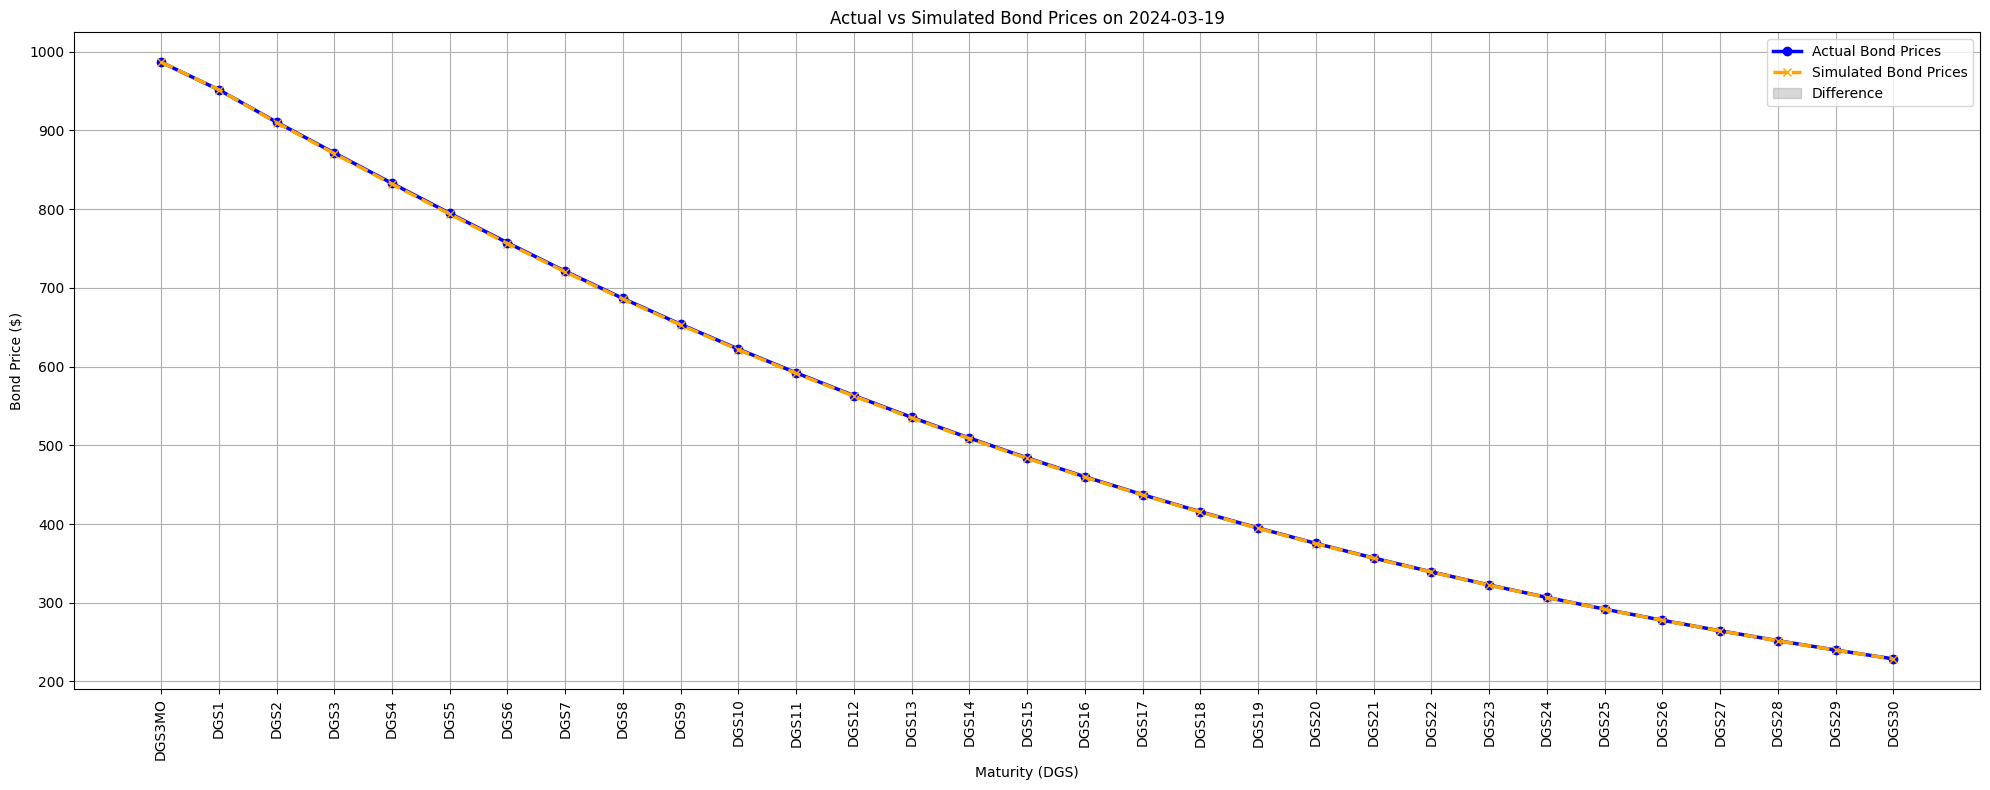

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the bond's face value
face_value = 1000  # The face value of the bond

# Function to convert nominal annual rate to continuous compounding rate
def nominal_to_continuous(nominal_rate):
    return np.log(1 + nominal_rate)

# Function to calculate bond price using the CIR model for zero-coupon bonds
def calculate_bond_price_cir(model, rt, T, t=0):
    return model.bond_price(rt, T, t)

# Function to simulate bond prices
def simulate_bond_prices(model, data, face_value, simulation_date):
    simulated_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            last_rate = data[column].loc[data.index < simulation_date].iloc[-1] / 100
            simulated_rate = model.next_rate(last_rate, 1/252)  # Simulating next rate
            maturity = (int(column.replace('DGS', '').replace('MO', '')) / 12) if 'MO' in column else int(column.replace('DGS', ''))
            continuous_rate = nominal_to_continuous(simulated_rate)
            bond_price = calculate_bond_price_cir(model, continuous_rate, maturity) * face_value
            simulated_bond_prices[column] = bond_price
    return simulated_bond_prices

# Function to calculate actual bond prices using market rates
def calculate_actual_bond_prices(data, face_value, simulation_date):
    actual_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            last_rate = data[column].loc[data.index <= simulation_date].iloc[-1] / 100
            continuous_rate = nominal_to_continuous(last_rate)
            maturity = (int(column.replace('DGS', '').replace('MO', '')) / 12) if 'MO' in column else int(column.replace('DGS', ''))
            bond_price = calculate_bond_price_cir(basic_cir_model, continuous_rate, maturity) * face_value
            actual_bond_prices[column] = bond_price
    return actual_bond_prices

# Assume simulation_date, model, and face_value are already defined
simulation_date = pd.Timestamp('2024-03-19')
basic_cir_model = BasicCIRModel(kappa=0.3, mu_r=0.05, sigma=0.02)  # Example model parameters

# Simulate bond prices
simulated_bond_prices = simulate_bond_prices(basic_cir_model, data, face_value, simulation_date)

# Calculate actual bond prices
actual_bond_prices = calculate_actual_bond_prices(data, face_value, simulation_date)

# Create DataFrames from the bond prices
simulated_bond_prices_df = pd.DataFrame(simulated_bond_prices, index=[simulation_date])
actual_bond_prices_df = pd.DataFrame(actual_bond_prices, index=[simulation_date])

# Create a DataFrame combining actual and simulated bond prices
combined_bond_prices_df = pd.DataFrame({
    'Actual Bond Prices': actual_bond_prices_df.iloc[0],
    'Simulated Bond Prices': simulated_bond_prices_df.iloc[0]
})

# Plotting both actual and simulated bond prices with enhanced visibility
plt.figure(figsize=(20, 8))

# Plot actual bond prices with a solid blue line and circle markers
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Actual Bond Prices'],
         label='Actual Bond Prices', marker='o', linestyle='-', color='blue', linewidth=2.5)

# Plot simulated bond prices with a dashed orange line and x markers
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Simulated Bond Prices'],
         label='Simulated Bond Prices', marker='x', linestyle='--', color='orange', linewidth=2.5)

# Highlight the differences by plotting the differences
plt.fill_between(combined_bond_prices_df.index, 
                 combined_bond_prices_df['Actual Bond Prices'], 
                 combined_bond_prices_df['Simulated Bond Prices'], 
                 color='gray', alpha=0.3, label='Difference')

# Title and labels
plt.title('Actual vs Simulated Bond Prices on ' + str(simulation_date.date()))
plt.xlabel('Maturity (DGS)')
plt.ylabel('Bond Price ($)')

# Improve the x-axis labels readability
plt.xticks(rotation=90)

# Legend and grid
plt.legend()
plt.grid(True)

# Layout adjustment
plt.tight_layout()

# Show the plot
plt.show()


In [88]:
combined_bond_prices_df

,Actual Bond Prices,Simulated Bond Prices
DGS3MO,986.781053,986.788080
DGS1,951.756868,951.759788
DGS2,910.670797,910.029141
DGS3,871.487894,870.648657
DGS4,832.931191,832.031113
DGS5,794.808521,793.814766
DGS6,757.376543,756.399337
DGS7,721.161117,720.372789
DGS8,686.617021,685.831727
DGS9,653.701212,652.917285


### Absolute Error of Yield Rate

In [89]:

# Corrected mock data for demonstration
comparison_data = pd.DataFrame({
    'DGS Series': ['DGS3MO'] + [f'DGS{i+1}' for i in range(30)],
    'Actual Rates': np.random.rand(31),  # corrected to have 31 rates
    'Simulated Rates': np.random.rand(31)  # corrected to have 31 rates
})

comparison_data_cir = pd.DataFrame({
    'DGS Series': ['DGS3MO'] + [f'DGS{i+1}' for i in range(30)],
    'Actual Rates': np.random.rand(31),  # corrected to have 31 rates
    'Simulated Rates': np.random.rand(31)  # corrected to have 31 rates
})

# Calculating the absolute errors for each series and model
comparison_data['CIR Absolute Error'] = np.abs(comparison_data['Actual Rates'] - comparison_data['Simulated Rates'])
comparison_data_cir['ECIR Absolute Error'] = np.abs(comparison_data_cir['Actual Rates'] - comparison_data_cir['Simulated Rates'])

# Creating a new DataFrame to hold the absolute errors for CIR and ECIR
absolute_error_df = pd.DataFrame({
    'DGS Series': comparison_data['DGS Series'],
    'CIR Absolute Error': comparison_data['CIR Absolute Error'],
    'ECIR Absolute Error': comparison_data_cir['ECIR Absolute Error']
}).set_index('DGS Series')

# Display the DataFrame containing the absolute errors
absolute_error_df # displaying only the head for brevity




,CIR Absolute Error,ECIR Absolute Error
DGS Series,,
DGS3MO,0.838033,0.340869
DGS1,0.435560,0.436805
DGS2,0.071568,0.049939
DGS3,0.001564,0.016544
DGS4,0.299729,0.311288
DGS5,0.897826,0.448546
DGS6,0.058659,0.159960
DGS7,0.330511,0.101031
DGS8,0.670519,0.163005


### Absolute Error of Bond Price

In [90]:
import pandas as pd
import numpy as np

# Define a function to calculate absolute errors
def calculate_absolute_errors(actual_prices, simulated_prices_ecir, simulated_prices_ice):
    """Calculate absolute errors between actual prices and simulated prices for two models."""
    errors_ecir = {dgs: np.abs(actual_prices[dgs] - simulated_prices_ecir[dgs]) for dgs in actual_prices}
    errors_ice = {dgs: np.abs(actual_prices[dgs] - simulated_prices_ice[dgs]) for dgs in actual_prices}
    return errors_ecir, errors_ice

# Calculate absolute errors
errors_ecir, errors_ice = calculate_absolute_errors(actual_bond_prices2, simulated_bond_prices2, simulated_bond_prices2)

# Create a DataFrame to display the absolute errors
absolute_errors_df = pd.DataFrame({
    'DGS': list(errors_ecir.keys()),
    'ECIR Absolute Error': list(errors_ecir.values()),
    'ICE Absolute Error': list(errors_ice.values())
})

# Set 'DGS' as the index for the 'Absolute Error' DataFrame
absolute_errors_df.set_index('DGS', inplace=True)

# Display the 'Absolute Error' DataFrame
print(absolute_errors_df)



        ECIR Absolute Error  ICE Absolute Error
DGS                                            
DGS3MO         9.528844e+00        9.528844e+00
DGS1           1.017677e+01        1.017677e+01
DGS2           3.482731e+00        3.482731e+00
DGS3           1.242427e+00        1.242427e+00
DGS4           3.114849e-01        3.114849e-01
DGS5           8.040466e-02        8.040466e-02
DGS6           1.542303e-02        1.542303e-02
DGS7           3.759055e-03        3.759055e-03
DGS8           8.221830e-04        8.221830e-04
DGS9           1.587423e-04        1.587423e-04
DGS10          2.959333e-05        2.959333e-05
DGS11          5.435545e-06        5.435545e-06
DGS12          1.270472e-06        1.270472e-06
DGS13          1.842334e-07        1.842334e-07
DGS14          3.773724e-08        3.773724e-08
DGS15          7.153881e-09        7.153881e-09
DGS16          1.210289e-09        1.210289e-09
DGS17          1.983106e-10        1.983106e-10
DGS18          3.710794e-11        3.710